# Homework 1: Classification, Perceptrons

Here, we'll continue on the theme of "supervised learning".

<img src="../figures/ml-key-ideas.jpg" width=400>

In the tutorial, we went through all of the components of the above diagram for a regression problme.

Now we'll revise the same steps, but looking at a **binary classification** example.

**Table of contents:**
- <span style="color:dimgray"> **Q1:** Data visualization </span>
- <span style="color:purple"> **Q2:** Hypothesis class: perception  </span>
- <span style="color:blue"> **Q3:** Loss function, binary cross entropy </span>
- <span style="color:turquoise"> **Q4:** Learning (fitting the model) </span>
- <span style="color:gold"> **Q5:** Final model</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 0. Dataset generation

In [2]:
def get_data(N):

    assert N % 2 == 0 # fct assumes even N 
    
    # The centers of the Gaussian blobs
    c1 = np.array([0,0])
    c2 = np.array([2,1])
    
    s1 = .333
    s2 = .45

    X1 = c1 + s1*np.random.randn(N//2,2)
    X2 = c2 + s2*np.random.randn(N//2,2)

    y1 = np.zeros(N//2)
    y2 = np.ones(N//2)

    X = np.concatenate([X1,X2],axis=0)
    y = np.hstack([y1,y2])
 
    # Shuffle the data
    idx = np.arange(N)
    np.random.shuffle(idx)

    return X[idx], y[idx]

In [3]:
X_feat,y = get_data(100)

In [4]:
X_feat[:3]

array([[ 1.77720373,  1.34192177],
       [ 0.42258677, -0.12806432],
       [-0.42526007,  0.40421437]])

In [5]:
y[:3]

array([1., 0., 0.])

### <span style="color:dimgray"> 1. Data visualization </span>

**TO DO:** Visualize the dataset

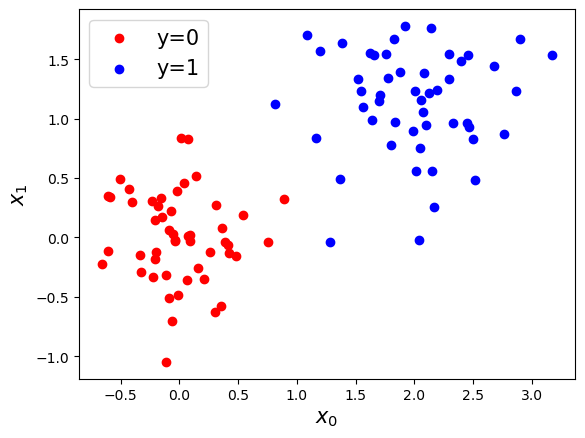

In [6]:
plt.scatter(*X_feat[y==0].T,label='y=0',color='r')
plt.scatter(*X_feat[y==1].T,label='y=1',color='b')

plt.xlabel('$x_0$',fontsize=15)
plt.ylabel('$x_1$',fontsize=15)
plt.legend(fontsize=15)

xlim = plt.xlim()
ylim = plt.ylim()
plt.show()

### <span style="color:purple"> 2. Hypothesis class: perception  </span>

The perceptron is a combination of a linear model with outputs bounded between (0,1), so we can interpret the output probabilisitcally.

$$f(X;w) = \sigma(X w),$$

where $\sigma(z) = \frac{1}{1+ \exp(-z)}$.


**TO DO:** Code up the perceptron

In [7]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))


def perceptron(X,w):
    z = X @ w
    return sigmoid(z)

In [8]:
n,d = X_feat.shape
X = np.column_stack([np.ones(n),X_feat])

w0 = np.random.randn(d+1)

**Question:** What do you expect the accuracy to be before fitting??

<span style="color:blue"> **Soln:** For random guesssing with two classes, the accuracy should be **50%**. </span>

**TO DO:** Test out your hypotheis, what is the accuracy of your perceptron with this w0 (?)

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/1479360051.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$f(X;w) = \sigma(X w)$',fontsize=15)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/1479360051.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(f[y==0],20,(0,1),color='r',alpha=.5,label='y=0')
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/1479360051.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(f[y==1],20,(0,1),color='b',alpha=.5,label='y=1')


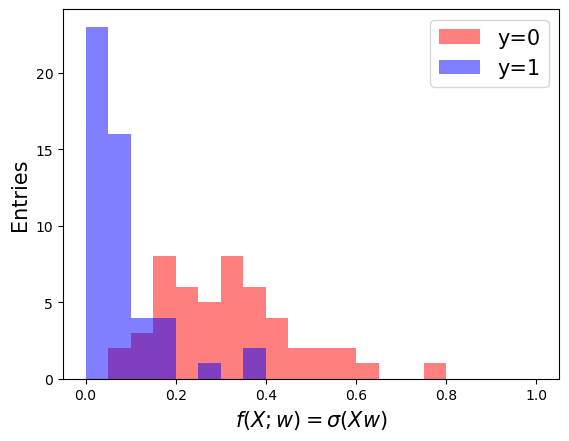

In [9]:
# Visualizing the predictions

f = perceptron(X,w0)

plt.hist(f[y==0],20,(0,1),color='r',alpha=.5,label='y=0')
plt.hist(f[y==1],20,(0,1),color='b',alpha=.5,label='y=1')
plt.legend(fontsize=15)
plt.xlabel('$f(X;w) = \sigma(X w)$',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.show()

In [10]:
'''
TO DO: Calculate accuracy
'''

y_pred = (f>0.5).astype(int)

print('acc is',np.sum(y_pred == y)/len(y))

acc is 0.44


### <span style="color:blue"> 3. Loss function, binary cross entropy </span>

Then by interpretting the output probabilistically we defined the binary cross entropy function in class:

$$
\begin{align}
\mathcal{L} &= \frac{1}{n}\sum_i - y^{(i)} \log [ f(x^{(i)};w) ] - (1-y^{(i)}) \log [ 1-  f(x^{(i)};w)  ] \\
&= \frac{1}{n}\sum_i - y^{(i)} \log [ \sigma(w^T x^{(i)})] - (1-y^{(i)}) \log [ 1- \sigma(w^T x^{(i)}) ]
\end{align}
$$

**TO DO:** Code up the BCE loss.

In [11]:
def bce(y,y_pred):
    '''
    TO DO: Implement
    '''
    nll = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
    return  np.mean(nll)

**Q:** What would you expect the loss to be before training?

^^ Tip It's always a good idea to ask yourself this question before training for any model that you have!!

<span style="color:blue"> **Soln:** Before training, the `y_pred` is mostly 0.5, and $ - \log 0.5 = \log 2 \approx 0.693 $ </span>

**Test your hypo!**

Note, if your result doesn't agree with your expectation, try a few iterations of initiatlizing `w0` and take an avg.

(And maybe dial down the variance when initializing `w0` a bit.)

In [12]:
bce(y,f)

np.float64(1.636570428977842)

In [13]:
bces = []

n_loop = 1000
for i in range(n_loop):
    w0 = .1*np.random.randn(d+1)
    f = perceptron(X,w0)
    bces.append(bce(y,f))
    # print(i,bce(y,f))

bces = np.array(bces)
print(f'Avg of {n_loop} iters',np.mean(bces))

Avg of 1000 iters 0.6988509180620374


In [14]:
np.log(2)

np.float64(0.6931471805599453)

Text(0, 0.5, 'Entries')

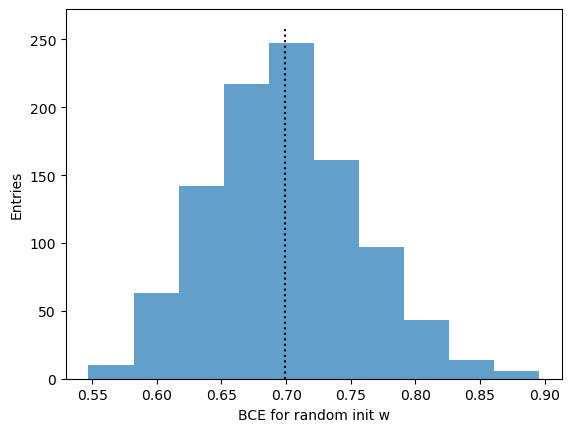

In [15]:
plt.hist(bces,alpha=.7)
plt.vlines(np.mean(bces),*plt.ylim(),color='k',ls=':')
plt.xlabel('BCE for random init w')
plt.ylabel('Entries')

<span style="color:blue">**Soln:** Yep, looks good! Agrees with expectations. </span>

### <span style="color:turquoise"> 4. Learning (fitting the model) </span>

Find the minimum of the loss function for this dataset.



<span style="color:blue">**Soln:** Note, there's no closed form solution for the perceptron, so we'll need to solve this by **gradient descent**. </span>

<span style="color:blue">**TO DO:** Calculate $\nabla_w \mathcal{L}$ </span>

<span style="color:blue">
$$ \begin{align}
\frac{\partial \mathcal{L}}{\partial w_k} &= \frac{\partial }{\partial w_k} \frac{1}{n}\sum_i - y^{(i)} \log \sigma (w^T x^{(i)}) - (1 - y^{(i)}) \log[ 1- \sigma (w^T x^{(i)}) ] \\
&=\frac{1}{n} \sum_i - \frac{ y^{(i)}}{ \cancel{ \sigma (w^T x^{(i)})}} \cancel{  \sigma (w^T x^{(i)})} [1- \sigma (w^T x^{(i)})] x^{(i)}_k + \frac{(1 - y^{(i)})}{ \cancel{1- \sigma (w^T x^{(i)})}} \sigma (w^T x^{(i)}) \cancel{[1-\sigma (w^T x^{(i)})] } x^{(i)}_k \\
&= \frac{1}{n} \sum_i -  y^{(i)} [1- \sigma (w^T x^{(i)})] x^{(i)}_k + (1 - y^{(i)}) \sigma (w^T x^{(i)})  x^{(i)}_k \\
&= \frac{1}{n} \sum_i \left[ -  y^{(i)} + \cancel {y^{(i)} \sigma (w^T x^{(i)}) }  + \sigma (w^T x^{(i)})  - \cancel{y^{(i)} \sigma (w^T x^{(i)}) }\right] x^{(i)}_k \\
&= \frac{1}{n} \sum_i \left[ -  y^{(i)}  + \sigma (w^T x^{(i)}) \right] x^{(i)}_k
\end{align}
$$



From here, I can read off the full gradient in matrix notation:

$$\nabla_w \mathcal{L} = \frac{1}{n} [\sigma(Xw) - y] X$$

where the last row I'm writng the loss in matrix notation</span>

In [16]:
def dLdw(y,X,w):
    
    n = len(y)
    y_pred = perceptron(X,w)

    return (y_pred - y) @ X / n

Text(0, 0.5, 'BCE Loss')

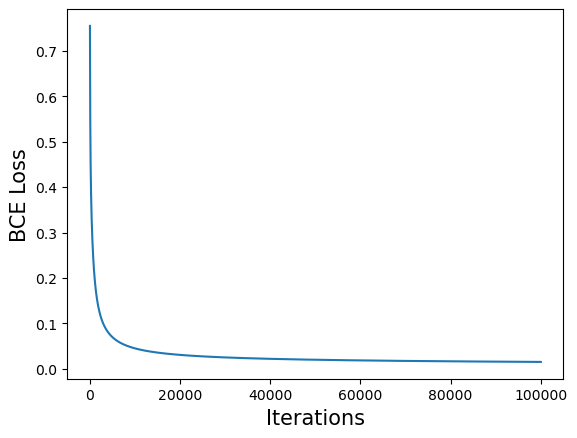

In [17]:
losses = []

w = np.copy(w0)

alpha=.01

for i in range(100000):

    y_pred = perceptron(X,w)
    Li = bce(y,y_pred)
    losses.append(Li)
    
    # print(i, Li)
    
    w -= alpha * dLdw(y,X,w)

plt.plot(losses)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('BCE Loss',fontsize=15)
# plt.xscale('log')

<span style="color:blue"> Nice! It looks like we've reached the minimum. </span>

### <span style="color:gold"> 5. Final model</span>

**To do:**
- [ ] Visualize the decision boundary (model prediciton vs. $(x_0,x_1)$)
    - Hint: `np.meshgrid` might be helpful!
- [ ] Calculate the accuracy after training
- [ ] Draw the roc curve
    - Hint: `np.add.accumulate` might be helpful!

In [18]:
xx = np.linspace(*xlim)
yy = np.linspace(*ylim)

xx,yy = np.meshgrid(xx,yy)

In [19]:
print('xx',xx.shape, 'yy',yy.shape)

xx (50, 50) yy (50, 50)


In [20]:
X_grid = np.column_stack([np.ones_like(xx.flatten()),xx.flatten(),yy.flatten()])
X_grid.shape

(2500, 3)

In [21]:
Z = perceptron(X_grid,w)
Z.shape

(2500,)

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/3800395751.py:11: SyntaxWarning: invalid escape sequence '\s'
  cbar.ax.set_ylabel('$f(X;w) = \sigma(Xw)$',rotation=270,labelpad=20,fontsize=15)


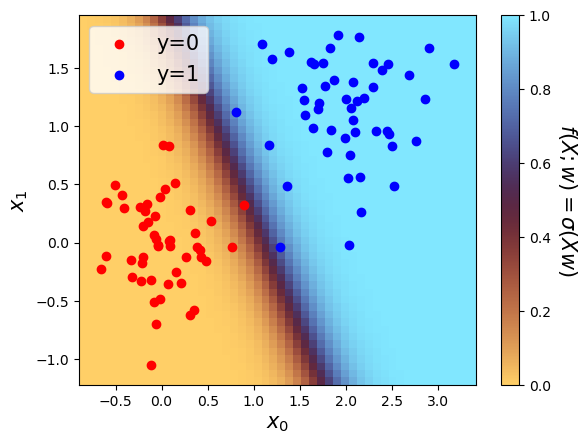

In [22]:
pcm = plt.pcolormesh(xx, yy, Z.reshape(xx.shape), cmap='managua',alpha=1,vmin=0,vmax=1)

plt.scatter(*X_feat[y==0].T,label='y=0',color='r')
plt.scatter(*X_feat[y==1].T,label='y=1',color='b')

plt.xlabel('$x_0$',fontsize=15)
plt.ylabel('$x_1$',fontsize=15)
plt.legend(fontsize=15)

cbar = plt.colorbar(pcm)
cbar.ax.set_ylabel('$f(X;w) = \sigma(Xw)$',rotation=270,labelpad=20,fontsize=15)
plt.show()


<span style="color:blue">**Nice:** We've perfectly separated the dataset here!</span>

In [26]:
# Calculate the accuracy
y_pred = perceptron(X,w)

acc = np.sum((y_pred >.5).astype(int) ==y)/len(y)
print('acc',acc)

acc 1.0


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/3011252047.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$f(X;w) = \sigma(X w)$',fontsize=15)
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/3011252047.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  h0, *_ = plt.hist(y_pred[y==0],20,(0,1),color='r',alpha=.5,label='y=0')
/var/folders/5j/ynfw2g6n2cgdwgp6xdh3byn00000gp/T/ipykernel_49421/3011252047.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  h1, *_ = plt.hist(y_pred[y==1],20,(0,1),color='b',alpha=.5,label='y=1')


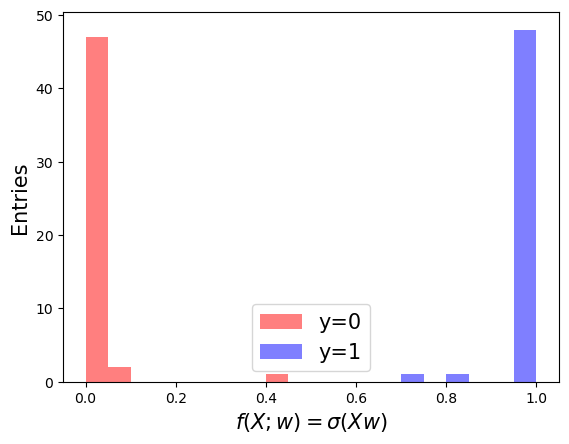

In [28]:
# Calculate the roc curve
h0, *_ = plt.hist(y_pred[y==0],20,(0,1),color='r',alpha=.5,label='y=0')
h1, *_ = plt.hist(y_pred[y==1],20,(0,1),color='b',alpha=.5,label='y=1')
plt.legend(fontsize=15)
plt.xlabel('$f(X;w) = \sigma(X w)$',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.show()

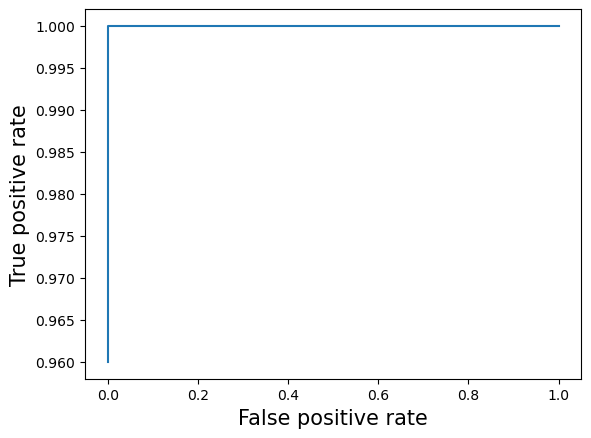

In [32]:
# Draw the roc curve
fpr = np.add.accumulate(h0[::-1])/np.sum(h0)
tpr = np.add.accumulate(h1[::-1])/np.sum(h1)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate',fontsize=15)
plt.ylabel('True positive rate',fontsize=15)
plt.show()

<span style='color:blue'> OK, since the dataset is perfectly separated, the area under curve (AUC) is 1. Not a super interesting roc curve, but, everything is consistent :) </span>